In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

data = pd.read_excel('/Users/matiasgonzalez/Desktop/Backtesting /bbdd seleccion portafolio.xlsx', index_col=0, parse_dates=True)
data = data.sort_index(ascending=True)
nombres = {'SPX Index': 'USA', 'MXEUG Index': 'Europa equities', 'UKX Index': 'UK', 'MXJP Index': 'Japon', 'MXAPJ Index': 'Asia',
            'MXLA Index': 'Latam', 'LF98TRUU Index': 'US HY', 'LUACTRUU Index': 'US IG', 'LBEATRUH Index': 'Europa bonds', 'BSELTRUU Index': 'Latam corp',
              'BSSUTRUU Index': 'Emerging sov', 'CABS Index': 'ABS', 'BCOMTR Index': 'Commodities', 'GLD US EQUITY': 'Oro', 'MXWD Index': 'World equities',}
data = data.rename(columns=nombres)
data

,USA,Europa equities,UK,Japon,Asia,Latam,US HY,US IG,Europa bonds,Latam corp,Emerging sov,ABS,Commodities,Oro,World equities
Dates,,,,,,,,,,,,,,,
2009-12-20,1104.0608,134.7947,8376.2673,6.1667,397.9240,3976.9720,1044.25,1905.70,189.55,555.2780,210.5655,150.639,271.8540,108.95,297.4064
2009-12-21,1115.6747,136.6045,8517.0090,6.1270,395.1220,3964.6336,1044.88,1893.96,189.14,554.5421,210.4116,150.407,270.7502,106.95,299.9065
2009-12-22,1119.6683,137.3385,8523.7259,6.1664,398.5079,4004.6886,1046.41,1889.69,188.91,555.3576,210.5412,150.258,270.5780,106.17,301.0280
2009-12-23,1122.4861,138.4527,8588.8493,6.1866,402.9362,4043.5493,1047.55,1891.02,188.62,555.1265,210.4938,150.368,275.4902,106.55,303.0812
2009-12-24,1128.3889,138.4434,8624.4220,6.2528,407.3329,4069.3275,1047.69,1883.73,188.63,554.6907,210.4230,150.244,276.9486,108.36,304.7853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-19,5993.7779,245.5818,11875.9472,11.6785,623.9013,2296.5618,2771.98,3385.50,311.54,1183.6470,422.2970,249.345,264.6555,310.26,1307.3138
2025-06-20,5981.0584,247.8573,11893.3939,11.5758,630.1330,2281.6601,2776.14,3387.72,311.59,1183.9853,421.8314,249.492,263.1584,310.13,1307.1972
2025-06-21,5981.0584,247.8573,11893.3939,11.5758,630.1330,2281.6601,2776.14,3387.72,311.59,1183.9853,421.8314,249.492,263.1584,310.13,1307.1972


<Figure size 1200x600 with 0 Axes>

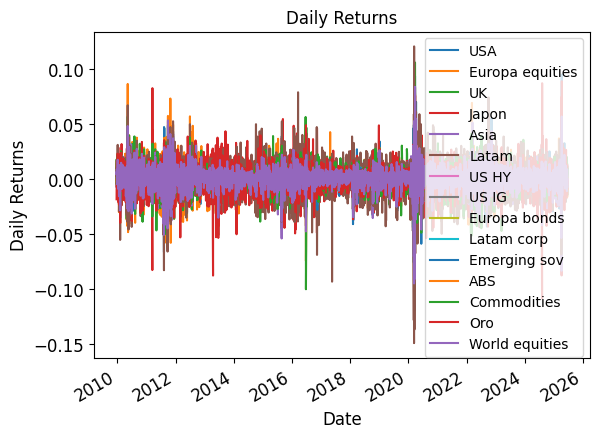

In [53]:
# Compute daily returns and drop rows with missing values
returns = data.pct_change().dropna(how="all")
#Eliminar valores cero
returns = returns[~(returns == 0).any(axis=1)]
plt.figure(figsize=(12, 6))
returns.plot(title="Daily Returns", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Daily Returns", fontsize=12)
plt.legend(returns.columns, fontsize=10)
plt.show()

In [54]:
#Benchmark Portfolio Backtest
def backtest_benchmark(returns, lookback=(252*5), rebalance_freq='ME'):
    portfolio_returns = []
    weights = [.35, .6, .05]  # Weights for USA, US IG, and Oro
    #n_assets = 3
    #weights = np.array([1/n_assets] * n_assets)
    activos = ['World equities', 'US IG', 'Oro']
    returns = returns[activos]

    for date in returns.index[lookback:]:
        period_return = np.sum(weights * returns.loc[date])
        portfolio_returns.append(period_return)

    return pd.Series(portfolio_returns, index=returns.index[lookback:]) 

benchmark_results = backtest_benchmark(returns)
print(benchmark_results)
retorno_acum_benchmark = (1+benchmark_results).cumprod()
print(retorno_acum_benchmark)

Dates
2015-06-10    0.002783
2015-06-11    0.004072
2015-06-12   -0.001851
2015-06-15   -0.002025
2015-06-16    0.001849
                ...   
2025-06-13   -0.005761
2025-06-16    0.001488
2025-06-17   -0.000669
2025-06-18   -0.000385
2025-06-20    0.000341
Length: 2298, dtype: float64
Dates
2015-06-10    1.002783
2015-06-11    1.006867
2015-06-12    1.005003
2015-06-15    1.002968
2015-06-16    1.004822
                ...   
2025-06-13    1.796809
2025-06-16    1.799483
2025-06-17    1.798278
2025-06-18    1.797586
2025-06-20    1.798200
Length: 2298, dtype: float64


In [55]:
#Restricciones de la cartera
def get_portfolio_asset_constraints():
        cons = [
                {'type': 'ineq', 'fun': lambda w: w[0:6].sum() - 0.15},  # At least 15% in equities
                {'type': 'ineq', 'fun': lambda w: w[6:12].sum() - 0.15},  # At least 15% in bonds
                {'type': 'ineq', 'fun': lambda w: w[12:14].sum() - 0.00},  # No lower limit for commodities
                {'type': 'ineq', 'fun': lambda w: 0.70 - w[0:6].sum()},  # Max 70% in equities
                {'type': 'ineq', 'fun': lambda w: 0.70 - w[6:12].sum()},  # Max 70% in bonds
                {'type': 'ineq', 'fun': lambda w: 0.20 - w[12:14].sum()}   # Max 20% in commodities
        ]
        return cons

def get_asset_maximums(returns):
    cons = []
    max_weight = 0.20
    for i in range(len(returns.columns)):
        cons.append({
            'type': 'ineq',
            'fun': lambda w, i=i: max_weight - w[i]
        })

    return cons

In [86]:
# CVaR, VaR y retorno anualizado
def cvar_loss(w, S, alpha=0.05):
    """Calcula el Conditional Value at Risk (CVaR)"""
    portf_rets = S @ w
    var = np.percentile(portf_rets, 100 * alpha)
    cvar = var + (1 / (alpha * len(portf_rets))) * np.sum(np.maximum(var - portf_rets, 0))
    return -cvar

def var_loss(w, S, alpha=0.05):
    """Calcula el Value at Risk (VaR)"""
    portf_rets = S @ w
    var = np.percentile(portf_rets, 100 * alpha)
    if var < 0:
        var = -var
    else:
        var = 0
    return var

def calcular_retorno_anualizado(returns, days=252):
    retorno_acumulado = (1+returns).prod()
    num_años = len(returns) / days
    retorno_anualizado = (retorno_acumulado ** (1/num_años)) - 1
    return retorno_anualizado

def port_vol(w,cov):
    return np.sqrt(np.dot(w.T, np.dot(cov, w))) * np.sqrt(252)  # Annualized volatility

# Max Return Model 

In [87]:
def max_return(w, mu):
    port_return = np.dot(w, mu)
    return -port_return

def calculate_maxreturn_weight(returns): 
    mu = returns.apply(calcular_retorno_anualizado,axis=0)  # Annualized mean returns
    S = returns.values
    alpha = 0.05  # Confidence level for CVaR

    n = len(returns.columns)
    # Definir las restricciones
    cons = [
            {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
            {'type': 'ineq', 'fun': lambda x: x}  # non-negative weights
    ]
            
    cons_assets = get_portfolio_asset_constraints()
    cons.extend(cons_assets)
    
    # Restricción para que ningún activo tenga más de un 20% de la cartera
    cons_assets_max = get_asset_maximums(returns)
    cons.extend(cons_assets_max)
    
    #Resrtricción de CVAR
    cons.append({
        'type': 'ineq',
        'fun': lambda w: 0.05 - cvar_loss(w, S, alpha) # VaR should be less than 5%
    })

    bounds = [(0, 1)] * n
    w0 = np.ones(n) / n

    res = minimize(
        max_return, w0, args=(mu), method='SLSQP',
        bounds=bounds, constraints=cons, options={'maxiter': 1000}
    )
    if res.success:
        return res.x
    else:
        raise ValueError("Optimization failed: " + res.message)
    

In [88]:
def backtest_maxreturn_weight(returns, lookback=(252*5), rebalance_freq='QE'):
    portfolio_returns = []
    historical_weights = []
    weights = None

    # Obtener las fechas de rebalanceo
    rebalance_dates = returns.resample(rebalance_freq).last().index

    for date in returns.index[lookback:]:
        if weights is None or date in rebalance_dates:
            historical = returns.loc[:date].iloc[-lookback:]
            weights = calculate_maxreturn_weight(historical)
            #print(f"Weights on {date}: {weights}")

        weights_series = pd.Series(weights, index=returns.columns)
        historical_weights.append(weights)
        period_return = np.sum(weights_series * returns.loc[date])
        portfolio_returns.append(period_return)

    return pd.Series(portfolio_returns, index=returns.index[lookback:]), pd.DataFrame(historical_weights, index=returns.index[lookback:], columns=returns.columns) 

portfolio_maxreturn, weights_maxreturn = backtest_maxreturn_weight(returns)
print(weights_maxreturn)
#print(portfolio_mvo_results_lim_cvar)
retorno_acum_maxreturn = (1+portfolio_maxreturn).cumprod()
print(retorno_acum_maxreturn)
retorno_acum_maxreturn.to_excel('/Users/matiasgonzalez/Desktop/Backtesting /retornos_acum_maxreturn.xlsx')
weights_maxreturn.to_excel('/Users/matiasgonzalez/Desktop/Backtesting /weights_maxreturn.xlsx')

/var/folders/jq/d_t5kfwx69d844mcxt_22fqc0000gn/T/ipykernel_13652/1440450800.py:4: RuntimeWarning: divide by zero encountered in matmul
  portf_rets = S @ w
/var/folders/jq/d_t5kfwx69d844mcxt_22fqc0000gn/T/ipykernel_13652/1440450800.py:4: RuntimeWarning: overflow encountered in matmul
  portf_rets = S @ w
/var/folders/jq/d_t5kfwx69d844mcxt_22fqc0000gn/T/ipykernel_13652/1440450800.py:4: RuntimeWarning: invalid value encountered in matmul
  portf_rets = S @ w


            USA  Europa equities            UK         Japon          Asia  \
Dates                                                                        
2015-06-10  0.2     2.666641e-16  2.931683e-16  2.000000e-01  2.064059e-16   
2015-06-11  0.2     2.666641e-16  2.931683e-16  2.000000e-01  2.064059e-16   
2015-06-12  0.2     2.666641e-16  2.931683e-16  2.000000e-01  2.064059e-16   
2015-06-15  0.2     2.666641e-16  2.931683e-16  2.000000e-01  2.064059e-16   
2015-06-16  0.2     2.666641e-16  2.931683e-16  2.000000e-01  2.064059e-16   
...         ...              ...           ...           ...           ...   
2025-06-13  0.2     2.000000e-01  5.000000e-02  3.885750e-17  9.395674e-17   
2025-06-16  0.2     2.000000e-01  5.000000e-02  3.885750e-17  9.395674e-17   
2025-06-17  0.2     2.000000e-01  5.000000e-02  3.885750e-17  9.395674e-17   
2025-06-18  0.2     2.000000e-01  5.000000e-02  3.885750e-17  9.395674e-17   
2025-06-20  0.2     2.000000e-01  5.000000e-02  3.885750e-17  9.

In [99]:
def max_return(w, mu):
    port_return = np.dot(w, mu)
    return -port_return

def calculate_maxreturn_sdres_weight(returns): 
    mu = returns.apply(calcular_retorno_anualizado,axis=0)  # Annualized mean returns
    S = returns.values
    alpha = 0.05  # Confidence level for CVaR

    n = len(returns.columns)
    # Definir las restricciones
    cons = [
            {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
            {'type': 'ineq', 'fun': lambda x: x},  # non-negative weights
    ]
            
    cons_assets = get_portfolio_asset_constraints()
    cons.extend(cons_assets)
    
    # Restricción para que ningún activo tenga más de un 20% de la cartera
    cons_assets_max = get_asset_maximums(returns)
    cons.extend(cons_assets_max)
    
    #Resrtricción de CVAR
    
    cons.append({
        'type': 'ineq',
        'fun': lambda w: 0.05 - var_loss(w, S, alpha) # VaR should be less than 5%
    })

    cons.append({
        'type': 'ineq',
        'fun': lambda w: 0.10 - port_vol(w, returns.cov().values)  
    })

    bounds = [(0, 1)] * n
    w0 = np.ones(n) / n

    res = minimize(
        max_return, w0, args=(mu), method='SLSQP',
        bounds=bounds, constraints=cons, options={'maxiter': 1000}
    )
    if res.success:
        return res.x
    else:
        raise ValueError("Optimization failed: " + res.message)
    

In [100]:
def backtest_maxreturn_sdres_weight(returns, lookback=(252*5), rebalance_freq='QE'):
    portfolio_returns = []
    historical_weights = []
    weights = None

    # Obtener las fechas de rebalanceo
    rebalance_dates = returns.resample(rebalance_freq).last().index

    for date in returns.index[lookback:]:
        if weights is None or date in rebalance_dates:
            historical = returns.loc[:date].iloc[-lookback:]
            weights = calculate_maxreturn_sdres_weight(historical)
            #print(f"Weights on {date}: {weights}")

        weights_series = pd.Series(weights, index=returns.columns)
        historical_weights.append(weights)
        period_return = np.sum(weights_series * returns.loc[date])
        portfolio_returns.append(period_return)

    return pd.Series(portfolio_returns, index=returns.index[lookback:]), pd.DataFrame(historical_weights, index=returns.index[lookback:], columns=returns.columns) 

portfolio_maxreturn_sdres, weights_maxreturn_sdres = backtest_maxreturn_sdres_weight(returns)
print(weights_maxreturn_sdres)
retorno_acum_maxreturn_sdres = (1+portfolio_maxreturn_sdres).cumprod()
print(retorno_acum_maxreturn_sdres)
retorno_acum_maxreturn_sdres.to_excel('/Users/matiasgonzalez/Desktop/Backtesting /retornos_acum_maxreturn_sdres.xlsx')
weights_maxreturn_sdres.to_excel('/Users/matiasgonzalez/Desktop/Backtesting /weights_maxreturn_sdres.xlsx')

/var/folders/jq/d_t5kfwx69d844mcxt_22fqc0000gn/T/ipykernel_13652/1440450800.py:11: RuntimeWarning: divide by zero encountered in matmul
  portf_rets = S @ w
/var/folders/jq/d_t5kfwx69d844mcxt_22fqc0000gn/T/ipykernel_13652/1440450800.py:11: RuntimeWarning: overflow encountered in matmul
  portf_rets = S @ w
/var/folders/jq/d_t5kfwx69d844mcxt_22fqc0000gn/T/ipykernel_13652/1440450800.py:11: RuntimeWarning: invalid value encountered in matmul
  portf_rets = S @ w


            USA  Europa equities            UK  Japon          Asia  \
Dates                                                                 
2015-06-10  0.2     2.666641e-16  2.931683e-16    0.2  2.064059e-16   
2015-06-11  0.2     2.666641e-16  2.931683e-16    0.2  2.064059e-16   
2015-06-12  0.2     2.666641e-16  2.931683e-16    0.2  2.064059e-16   
2015-06-15  0.2     2.666641e-16  2.931683e-16    0.2  2.064059e-16   
2015-06-16  0.2     2.666641e-16  2.931683e-16    0.2  2.064059e-16   
...         ...              ...           ...    ...           ...   
2025-06-13  0.2     3.059041e-02  0.000000e+00    0.0  0.000000e+00   
2025-06-16  0.2     3.059041e-02  0.000000e+00    0.0  0.000000e+00   
2025-06-17  0.2     3.059041e-02  0.000000e+00    0.0  0.000000e+00   
2025-06-18  0.2     3.059041e-02  0.000000e+00    0.0  0.000000e+00   
2025-06-20  0.2     3.059041e-02  0.000000e+00    0.0  0.000000e+00   

                   Latam  US HY         US IG  Europa bonds    Latam corp  \

In [ ]:
def max_return(w, mu):
    port_return = np.dot(w, mu)
    return -port_return

def calculate_maxreturn_sdres8_weight(returns): 
    mu = returns.apply(calcular_retorno_anualizado,axis=0)  # Annualized mean returns
    S = returns.values
    alpha = 0.05  # Confidence level for CVaR

    n = len(returns.columns)
    # Definir las restricciones
    cons = [
            {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
            {'type': 'ineq', 'fun': lambda x: x},  # non-negative weights
    ]
            
    cons_assets = get_portfolio_asset_constraints()
    cons.extend(cons_assets)
    
    # Restricción para que ningún activo tenga más de un 20% de la cartera
    cons_assets_max = get_asset_maximums(returns)
    cons.extend(cons_assets_max)
    
    #Resrtricción de CVAR
    
    cons.append({
        'type': 'ineq',
        'fun': lambda w: 0.05 - var_loss(w, S, alpha) # VaR should be less than 5%
    })

    cons.append({
        'type': 'ineq',
        'fun': lambda w: 0.08 - port_vol(w, returns.cov().values)  
    })

    bounds = [(0, 1)] * n
    w0 = np.ones(n) / n

    res = minimize(
        max_return, w0, args=(mu), method='SLSQP',
        bounds=bounds, constraints=cons, options={'maxiter': 1000}
    )
    if res.success:
        return res.x
    else:
        raise ValueError("Optimization failed: " + res.message)
    

In [ ]:
def backtest_maxreturn_sdres8_weight(returns, lookback=(252*5), rebalance_freq='QE'):
    portfolio_returns = []
    historical_weights = []
    weights = None

    # Obtener las fechas de rebalanceo
    rebalance_dates = returns.resample(rebalance_freq).last().index

    for date in returns.index[lookback:]:
        if weights is None or date in rebalance_dates:
            historical = returns.loc[:date].iloc[-lookback:]
            weights = calculate_maxreturn_sdres8_weight(historical)
            #print(f"Weights on {date}: {weights}")

        weights_series = pd.Series(weights, index=returns.columns)
        historical_weights.append(weights)
        period_return = np.sum(weights_series * returns.loc[date])
        portfolio_returns.append(period_return)

    return pd.Series(portfolio_returns, index=returns.index[lookback:]), pd.DataFrame(historical_weights, index=returns.index[lookback:], columns=returns.columns) 

portfolio_maxreturn_sdres8, weights_maxreturn_sdres8 = backtest_maxreturn_sdres_weight(returns)
print(weights_maxreturn_sdres8)
retorno_acum_maxreturn_sdres8 = (1+portfolio_maxreturn_sdres8).cumprod()
print(retorno_acum_maxreturn_sdres8)
retorno_acum_maxreturn_sdres8.to_excel('/Users/matiasgonzalez/Desktop/Backtesting /retornos_acum_maxreturn_sdres8.xlsx')
weights_maxreturn_sdres8.to_excel('/Users/matiasgonzalez/Desktop/Backtesting /weights_maxreturn_sdres8.xlsx')

# Min VaR Model

In [ ]:
def max_return(w, mu):
    port_return = np.dot(w, mu)
    return port_return

def calculate_min_var_weight(returns): 
    mu = returns.apply(calcular_retorno_anualizado,axis=0)  # Annualized mean returns
    S = returns.values
    alpha = 0.05  # Confidence level for CVaR

    n = len(returns.columns)
    cons = [
            {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
            {'type': 'ineq', 'fun': lambda x: x}  # non-negative weights
    ]
            
    # Restricción para los asset class de la cartera 
    cons_assets = get_portfolio_asset_constraints()
    cons.extend(cons_assets)

    # Restricción para que ningún activo tenga más de un 20% de la cartera
    cons_assets_max = get_asset_maximums(returns)
    cons.extend(cons_assets_max)
    
    #Resrtricción de rentabilidad mínima
    cons.append({
        'type': 'ineq',
        'fun': lambda w: max_return(w,mu) - 0.05 # return should be greater than 7%
    })

    bounds = [(0, 1)] * n
    w0 = np.ones(n) / n

    res = minimize(
        var_loss, w0, args=(S, alpha), method='SLSQP',
        bounds=bounds, constraints=cons, options={'maxiter': 1000}
    )
    if res.success:
        return res.x
    else:
        raise ValueError("Optimization failed: " + res.message)
    

In [94]:
def backtest_min_var_weight(returns, lookback=(252*5), rebalance_freq='QE'):
    portfolio_returns = []
    historical_weights = []
    weights = None

    # Obtener las fechas de rebalanceo
    rebalance_dates = returns.resample(rebalance_freq).last().index

    for date in returns.index[lookback:]:
        if weights is None or date in rebalance_dates:
            historical = returns.loc[:date].iloc[-lookback:]
            weights = calculate_min_var_weight(historical)
            #print(f"Weights on {date}: {weights}")

        weights_series = pd.Series(weights, index=returns.columns)
        historical_weights.append(weights)
        period_return = np.sum(weights_series * returns.loc[date])
        portfolio_returns.append(period_return)

    return pd.Series(portfolio_returns, index=returns.index[lookback:]), pd.DataFrame(historical_weights, index=returns.index[lookback:], columns=returns.columns) 

portfolio_min_var, weights_min_var = backtest_min_var_weight(returns)
print(weights_min_var)
#print(portfolio_mvo_results_lim_cvar)
retorno_acum_min_var = (1+portfolio_min_var).cumprod()
print(retorno_acum_min_var)
retorno_acum_min_var.to_excel('/Users/matiasgonzalez/Desktop/Backtesting /retornos_acum_min_var.xlsx')
weights_min_var.to_excel('/Users/matiasgonzalez/Desktop/Backtesting /weights_min_var.xlsx')


/var/folders/jq/d_t5kfwx69d844mcxt_22fqc0000gn/T/ipykernel_13652/1440450800.py:11: RuntimeWarning: divide by zero encountered in matmul
  portf_rets = S @ w
/var/folders/jq/d_t5kfwx69d844mcxt_22fqc0000gn/T/ipykernel_13652/1440450800.py:11: RuntimeWarning: overflow encountered in matmul
  portf_rets = S @ w
/var/folders/jq/d_t5kfwx69d844mcxt_22fqc0000gn/T/ipykernel_13652/1440450800.py:11: RuntimeWarning: invalid value encountered in matmul
  portf_rets = S @ w


ValueError: Optimization failed: Positive directional derivative for linesearch

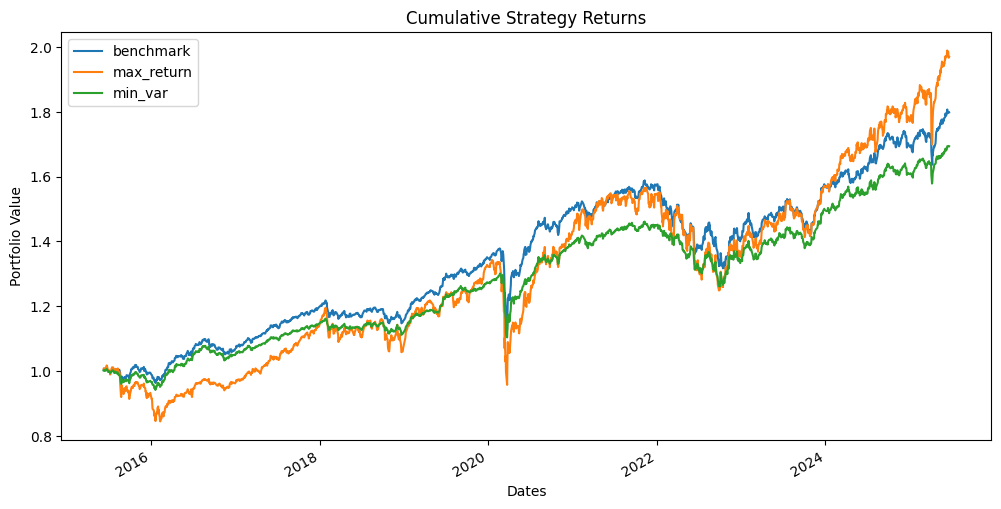

In [61]:
#Graficar los retornos de cada estrategia 
import matplotlib.pyplot as plt

returns_dict = {
    'benchmark': benchmark_results,
    'max_return': portfolio_maxreturn,
    'min_var': portfolio_min_var
}

def plot_strategy_comparison(returns_dict):
    cumulative_returns = pd.DataFrame({
        strategy: (1 + returns).cumprod() 
        for strategy, returns in returns_dict.items()
    })

    cumulative_returns.plot(figsize=(12, 6))
    plt.title('Cumulative Strategy Returns')
    plt.ylabel('Portfolio Value')
    plt.show()

plot_strategy_comparison(returns_dict)

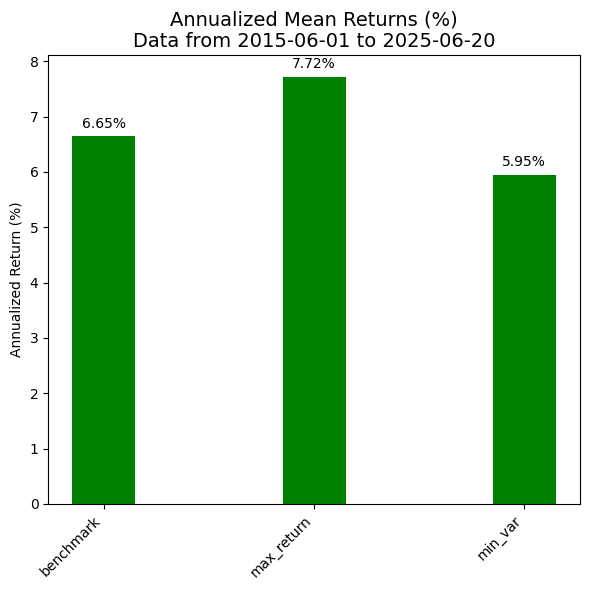

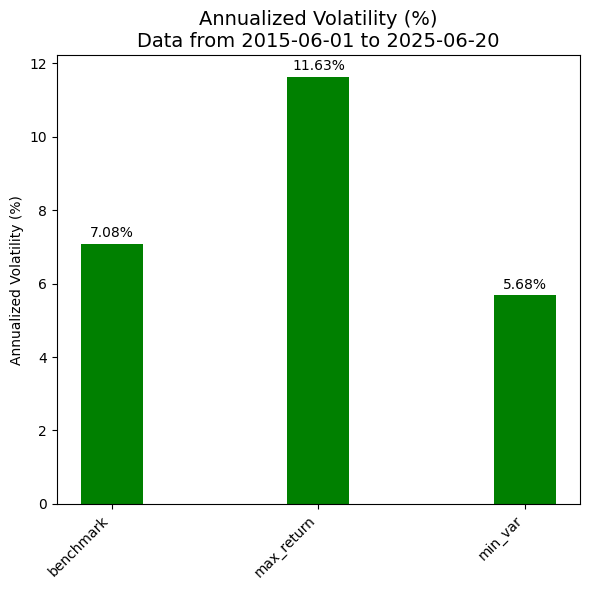

In [62]:
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_annualized_mean_returns(returns_dict):
    annualized_mean_returns_data = {}
    for strategy, returns in returns_dict.items():
        annualized_return = (1 + returns).prod() ** (252 / len(returns)) - 1
        annualized_mean_returns_data[strategy] = annualized_return

    annualized_mean_returns = pd.Series(annualized_mean_returns_data)

    conditional_colors = ["green" if value > 0 else "red" for value in annualized_mean_returns]

    fig, ax = plt.subplots(figsize=(6, 6))

    bars = ax.bar(
        annualized_mean_returns.index,
        annualized_mean_returns * 100,  # Convert to percentage
        color=conditional_colors,
        width= 0.3
    );

    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + np.sign(height) * 0.1,
            f'{height:.2f}%',
            ha='center', va='bottom' if height > 0 else 'top',
            fontsize=10
        );

    start_date = "2015-06-01"
    title_text = f"Annualized Mean Returns (%)\nData from {start_date} to {returns.index[-1].strftime('%Y-%m-%d')}"
    ax.set_title(title_text, fontsize=14);
    plt.xticks(rotation=45, ha='right');
    plt.ylabel("Annualized Return (%)");
    plt.tight_layout();
    plt.show()

def plot_annualized_volatility(returns_dict):
    annualized_volatility_data = {}
    for strategy, returns in returns_dict.items():
        annualized_volatility = returns.std() * np.sqrt(252)
        annualized_volatility_data[strategy] = annualized_volatility

    annualized_volatility = pd.Series(annualized_volatility_data)

    conditional_colors = ["green" if value > 0 else "red" for value in annualized_volatility]

    fig, ax = plt.subplots(figsize=(6, 6))

    bars = ax.bar(
        annualized_volatility.index,
        annualized_volatility * 100,  # Convert to percentage
        color=conditional_colors,
        width= 0.3
    );

    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + np.sign(height) * 0.1,
            f'{height:.2f}%',
            ha='center', va='bottom' if height > 0 else 'top',
            fontsize=10
        );

    start_date = "2015-06-01"
    title_text = f"Annualized Volatility (%)\nData from {start_date} to {returns.index[-1].strftime('%Y-%m-%d')}"
    ax.set_title(title_text, fontsize=14);
    plt.xticks(rotation=45, ha='right');
    plt.ylabel("Annualized Volatility (%)");
    plt.tight_layout();
    plt.show()

plot_annualized_mean_returns(returns_dict)
plot_annualized_volatility(returns_dict)

In [63]:
def annualized_sharpe_ratio(returns_dict):
    sharpe_ratios = {}
    for strategy, returns in returns_dict.items():
        annualized_return = (1 + returns).prod() ** (252 / len(returns)) - 1
        annualized_volatility = returns.std() * np.sqrt(252)
        sharpe_ratio = annualized_return / annualized_volatility if annualized_volatility > 0 else 0
        sharpe_ratios[strategy] = sharpe_ratio

    return pd.Series(sharpe_ratios)
annualized_sharpe = annualized_sharpe_ratio(returns_dict)
print(f"annualized sharpe ratio by strategy: \n{annualized_sharpe}")

def annualized_sortino_ratio(returns_dict, target_return=0.03):
    sortino_ratios = {}
    for strategy, returns in returns_dict.items():
        annualized_return = (1 + returns).prod() ** (252 / len(returns)) - 1
        downside_returns = returns[returns < target_return]
        downside_deviation = np.sqrt((downside_returns**2).mean()) * np.sqrt(252) if len(downside_returns) > 0 else 0
        sortino_ratio = (annualized_return - target_return) / downside_deviation if downside_deviation > 0 else 0
        sortino_ratios[strategy] = sortino_ratio

    return pd.Series(sortino_ratios)
annualized_sortino = annualized_sortino_ratio(returns_dict)
print(f"annualized sortino ratio by strategy: \n{annualized_sortino}")

def annualized_max_drawdown(returns_dict):
    max_drawdowns = {}
    for strategy, returns in returns_dict.items():
        cumulative_returns = (1 + returns).cumprod()
        peak = cumulative_returns.cummax()
        drawdown = (cumulative_returns - peak) / peak
        max_drawdown = drawdown.min()
        max_drawdowns[strategy] = max_drawdown

    return pd.Series(max_drawdowns)
annualized_max_dd = annualized_max_drawdown(returns_dict)
print(f"annualized max drawdown by strategy: \n{annualized_max_dd}")

def annualized_calmar_ratio(returns_dict):
    calmar_ratios = {}
    for strategy, returns in returns_dict.items():
        annualized_return = (1 + returns).prod() ** (252 / len(returns)) - 1
        max_drawdown = annualized_max_drawdown({strategy: returns})[strategy]
        calmar_ratio = annualized_return / abs(max_drawdown) if max_drawdown < 0 else 0
        calmar_ratios[strategy] = calmar_ratio

    return pd.Series(calmar_ratios)
annualized_calmar = annualized_calmar_ratio(returns_dict)
print(f"annualized calmar ratio by strategy: \n{annualized_calmar}")

strategies_ratios = pd.DataFrame({
    'Annualized Sharpe Ratio': annualized_sharpe,
    'Annualized Sortino Ratio': annualized_sortino,
    'Annualized Max Drawdown': annualized_max_dd,
    'Annualized Calmar Ratio': annualized_calmar
})
strategies_ratios 

annualized sharpe ratio by strategy: 
benchmark     0.938341
max_return    0.663654
min_var       1.047167
dtype: float64
annualized sortino ratio by strategy: 
benchmark     0.527540
max_return    0.423310
min_var       0.518149
dtype: float64
annualized max drawdown by strategy: 
benchmark    -0.182725
max_return   -0.287603
min_var      -0.151799
dtype: float64
annualized calmar ratio by strategy: 
benchmark     0.363731
max_return    0.268455
min_var       0.391946
dtype: float64


,Annualized Sharpe Ratio,Annualized Sortino Ratio,Annualized Max Drawdown,Annualized Calmar Ratio
benchmark,0.938341,0.527540,-0.182725,0.363731
max_return,0.663654,0.423310,-0.287603,0.268455
min_var,1.047167,0.518149,-0.151799,0.391946
